#📌 Extracción

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_json('/content/drive/Othercomputers/Mi portátil/Google Drive/TelecomX_Data.json')

In [3]:
df.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [5]:
customer_df = pd.json_normalize(df['customer'])   # Normaliza la columna “customer”
df = pd.concat([df, customer_df], axis=1)		# concatena las nuevas columnas normalizadas al DataFrame “df”
df = df.drop('customer', axis=1)			# elimina la antigua columna “customer”

phone_df = pd.json_normalize(df['phone'])		# Normaliza la columna “phone”
df = pd.concat([df, phone_df], axis=1)			# concatena las nuevas columnas normalizadas al DataFrame “df”
df = df.drop('phone', axis=1)				# elimina la antigua columna “phone”

internet_df = pd.json_normalize(df['internet'])		# Normaliza la columna “internet”
df = pd.concat([df, internet_df], axis=1)		# concatena las nuevas columnas normalizadas al DataFrame “df”
df = df.drop('internet', axis=1)			# elimina la columna “phone”

df

,customerID,Churn,account,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No
7263,9992-RRAMN,Yes,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes
7264,9992-UJOEL,No,"{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No
7265,9993-LHIEB,No,"{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes


In [6]:
account_df = pd.json_normalize(df['account'])		# Normaliza la columna “account” y cambiar el punto por guion bajo
df = df.drop('account', axis=1)
df = pd.concat([df, account_df], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
df['Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')		# Convertir 'Total' a numérico, forzando errores a NaN

In [10]:
df['Total'] = df['Total'].fillna(0)
df['Monthly'] = df['Charges.Monthly']
df = df.drop('Charges.Total', axis=1)
df = df.drop('Charges.Monthly', axis=1)


In [11]:
print(f"Valores únicos en 'Churn' antes de corregir: {df['Churn'].unique()}")
df['Churn'] = df['Churn'].replace('', 'No')
print(f"Valores únicos en 'Churn' después de corregir: {df['Churn'].unique()}")


Valores únicos en 'Churn' antes de corregir: ['No' 'Yes' '']
Valores únicos en 'Churn' después de corregir: ['No' 'Yes']


In [12]:
# Convertir columnas categóricas a tipo 'category'
for col in ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'PaperlessBilling', 'gender', 'Contract', 'PaymentMethod', 'InternetService', 'Churn']:
    if col in df.columns:
        df[col] = df[col].astype('category')


In [13]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Total,Monthly
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,593.30,65.60
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,542.40,59.90
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,280.85,73.90
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1237.85,98.00
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,267.40,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,742.90,55.15
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1873.70,85.10
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,92.75,50.30
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,4627.65,67.85


#📊 Carga y análisis

In [14]:
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df[['tenure', 'Monthly', 'Total']].describe())



Estadísticas descriptivas de las variables numéricas:
            tenure      Monthly        Total
count  7267.000000  7267.000000  7267.000000
mean     32.346498    64.720098  2277.182035
std      24.571773    30.129572  2268.648587
min       0.000000    18.250000     0.000000
25%       9.000000    35.425000   396.200000
50%      29.000000    70.300000  1389.200000
75%      55.000000    89.875000  3778.525000
max      72.000000   118.750000  8684.800000


<ipython-input-15-1783609199>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


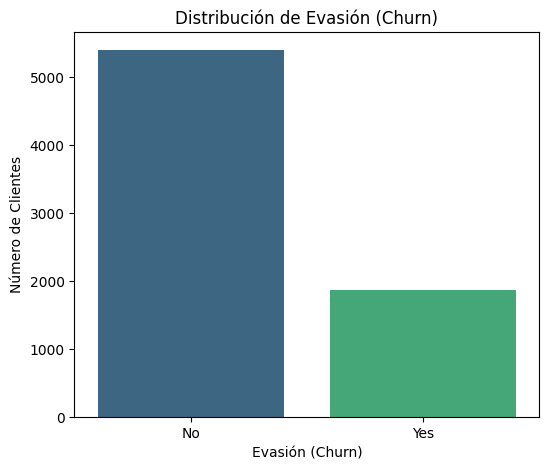

In [15]:
# Distribución de evasión (Churn)
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Clientes')
plt.show()



Análisis de evasión por variables categóricas...


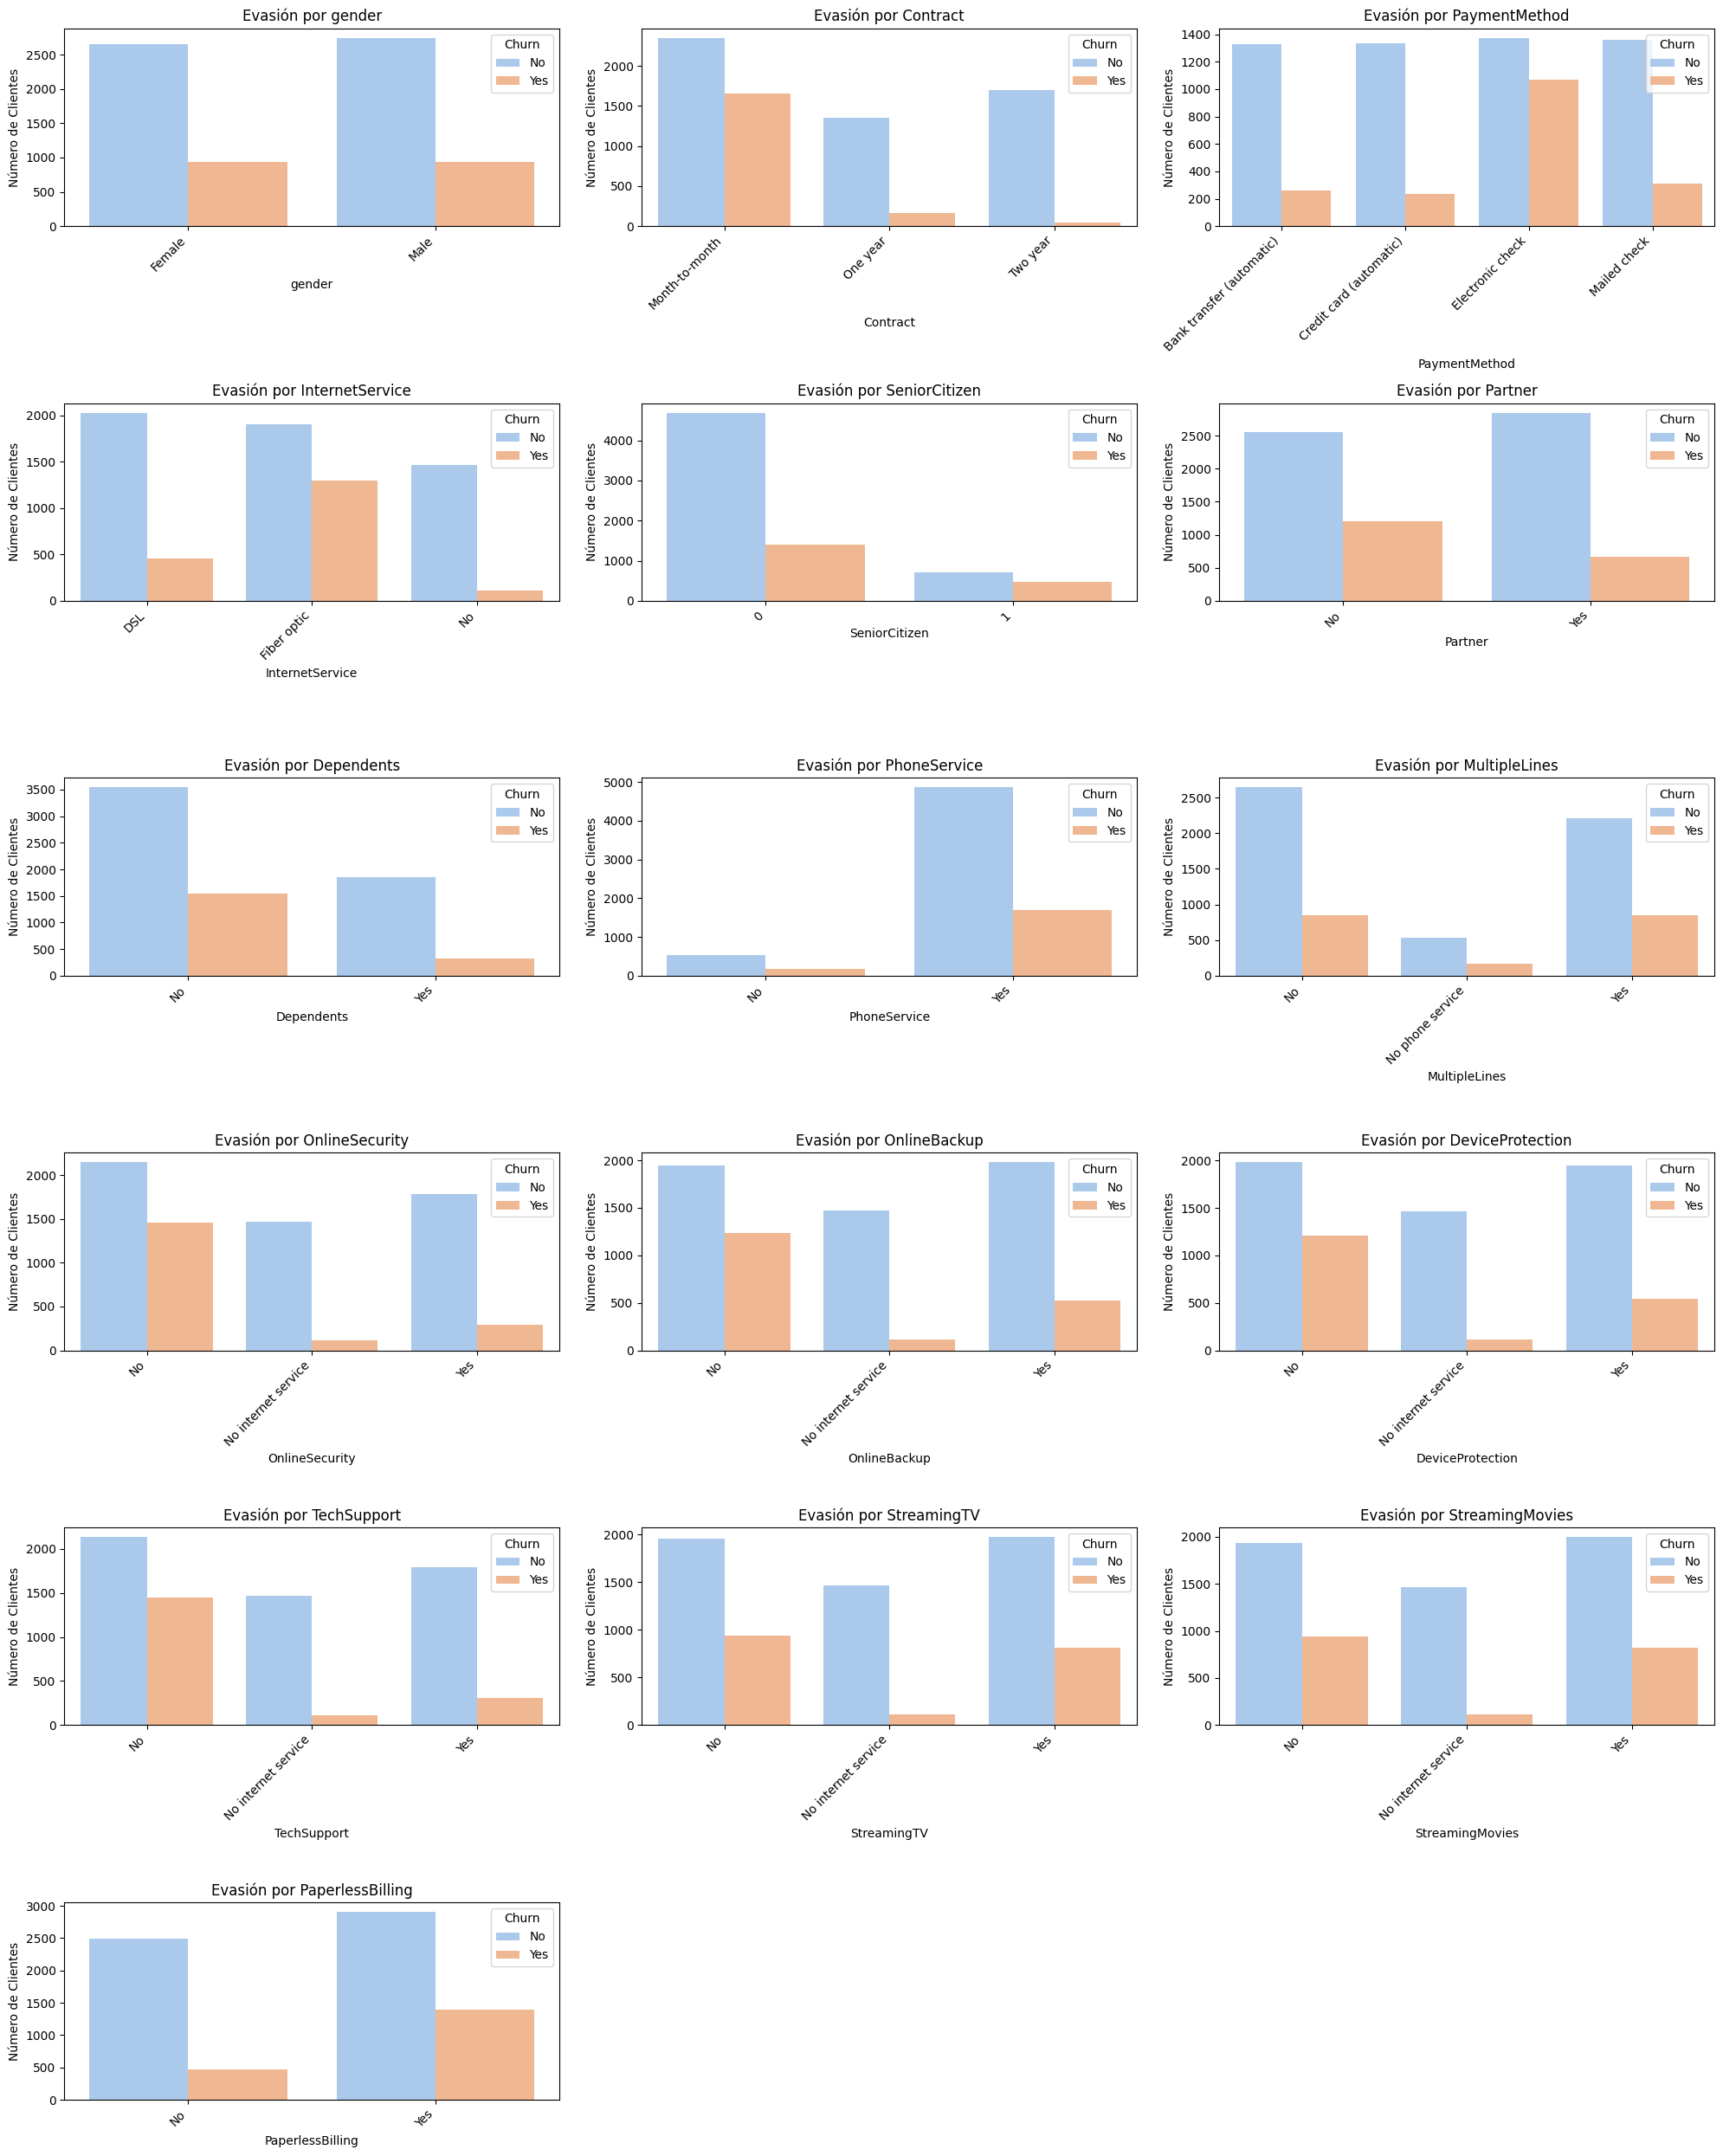

In [16]:
print("\nAnálisis de evasión por variables categóricas...")
categorical_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService',
                    'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(x=col, hue='Churn', data=df, palette='pastel')
    plt.title(f'Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Análisis de evasión por variables numéricas...


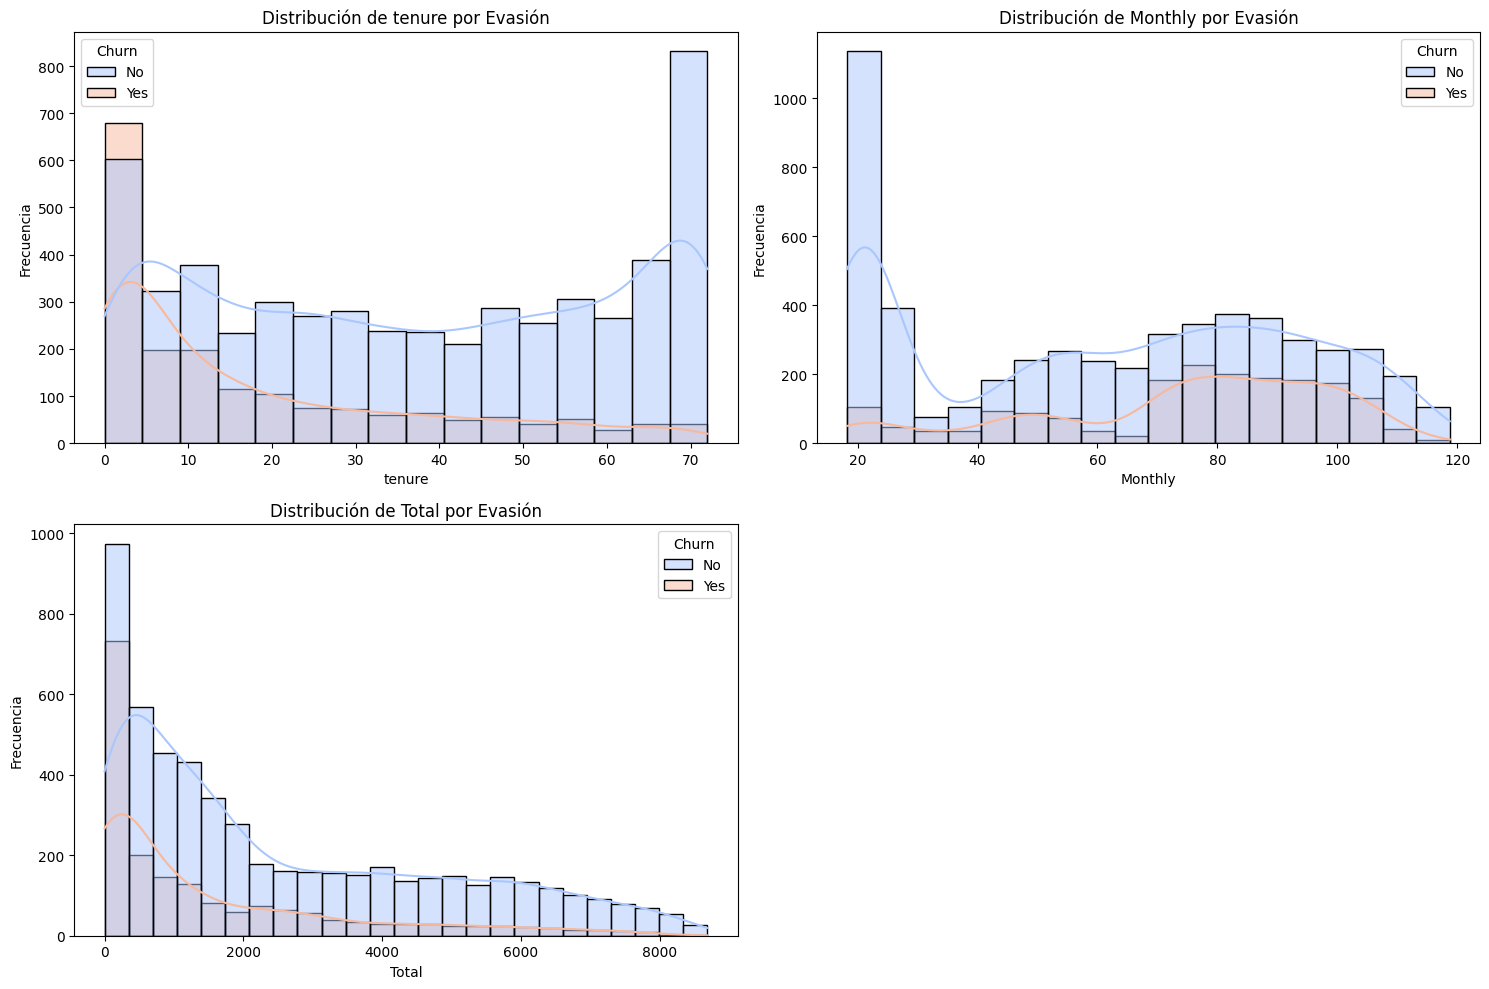

In [17]:
print("\nAnálisis de evasión por variables numéricas...")
numerical_cols = ['tenure', 'Monthly', 'Total']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='coolwarm')
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()



In [18]:
# Crear la columna "Cuentas_Diarias"
df['Cuentas_Diarias'] = df['Monthly'] / 30




--- Análisis de Correlación ---

Matriz de Correlación:
                   tenure   Monthly     Total  Cuentas_Diarias  Num_Services  \
tenure           1.000000  0.247982  0.825407         0.247982      0.523853   
Monthly          0.247982  1.000000  0.652211         1.000000      0.802709   
Total            0.825407  0.652211  1.000000         0.652211      0.797138   
Cuentas_Diarias  0.247982  1.000000  0.652211         1.000000      0.802709   
Num_Services     0.523853  0.802709  0.797138         0.802709      1.000000   
Churn_Encoded   -0.344079  0.189866 -0.193345         0.189866     -0.064642   

                 Churn_Encoded  
tenure               -0.344079  
Monthly               0.189866  
Total                -0.193345  
Cuentas_Diarias       0.189866  
Num_Services         -0.064642  
Churn_Encoded         1.000000  


<ipython-input-19-2480715215>:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
<ipython-input-19-2480715215>:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
<ipython-input-19-2480715215>:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the ca

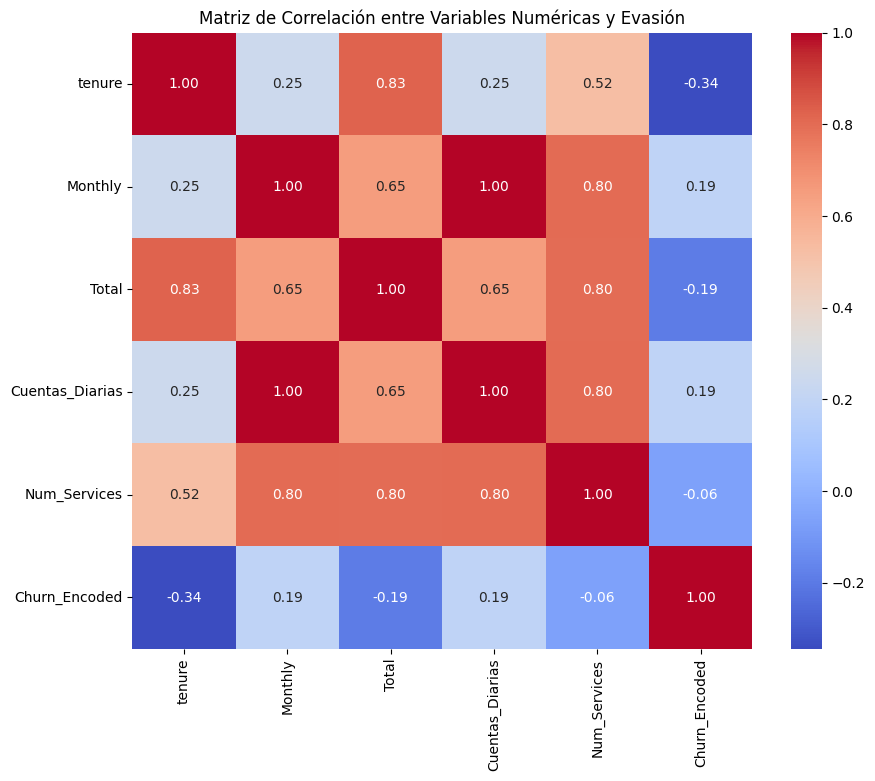


Correlación entre Cuentas_Diarias y Churn: 0.1898657177458538
Correlación entre Num_Services y Churn: -0.06464192530480736


In [19]:
# Análisis de correlación entre variables
print("\n--- Análisis de Correlación ---")

# Codificar 'Churn' a numérico (Sí: 1, No: 0)
df['Churn_Encoded'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calcular el número de servicios contratados
service_cols_to_encode = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                          'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Asegurarse de que los valores de 'No internet service' y 'No phone service' se traten como 'No'
for col in service_cols_to_encode:
    if col in df.columns:
        df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
        df[f'{col}_Encoded'] = df[col].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
    else:
        print(f"Advertencia: La columna '{col}' no se encontró para codificar.")

df['Num_Services'] = df[[f'{col}_Encoded' for col in service_cols_to_encode]].sum(axis=1)

# Seleccionar columnas numéricas y 'Churn_Encoded' para la matriz de correlación
correlation_cols = ['tenure', 'Monthly', 'Total', 'Cuentas_Diarias', 'Num_Services', 'Churn_Encoded']
correlation_matrix = df[correlation_cols].corr()

print("\nMatriz de Correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas y Evasión')
plt.show()

print("\nCorrelación entre Cuentas_Diarias y Churn:", df['Cuentas_Diarias'].corr(df['Churn_Encoded']))
print("Correlación entre Num_Services y Churn:", df['Num_Services'].corr(df['Churn_Encoded']))


#📄Informe final

# **Informe Final**

# Informe de Análisis de Evasión de Clientes (Churn) - Telecom X

## Introducción
El presente informe detalla el análisis de los datos de clientes de Telecom X, con el objetivo principal de comprender los factores que contribuyen a la "evasión" o "churn" de clientes. La alta tasa de cancelaciones es una preocupación para la empresa, y este análisis exploratorio busca identificar patrones y obtener información valiosa que sirva de base para el desarrollo de modelos predictivos y estrategias de retención.

## Limpieza y Tratamiento de Datos
Para preparar los datos para el análisis, se llevaron a cabo los siguientes pasos:
1.  **Extracción de Datos:** Los datos, proporcionados en formato JSON, se cargaron directamente en un DataFrame de Pandas.
2.  **Aplanamiento de Columnas Anidadas:** Las columnas 'customer', 'phone', 'internet' y 'account' contenían diccionarios anidados. Estas columnas fueron aplanadas para exponer sus sub-atributos como columnas individuales, facilitando el acceso y la manipulación de los datos.
3.  **Manejo de Inconsistencias:**
    * La columna `Total` (anteriormente `Charges.Total`) se identificó como tipo `object` y contenía valores no numéricos. Se convirtió a tipo numérico, y los valores que no pudieron ser convertidos (`''` en este caso) se reemplazaron por 0, asumiendo que representan clientes nuevos sin cargos totales acumulados.
    * La columna `Churn` contenía un valor vacío (`''`) además de 'Yes' y 'No'. Se interpretó que el valor vacío significaba 'No Churn' y se reemplazó por 'No' para mantener la consistencia.
4.  **Creación de la Columna 'Cuentas_Diarias':** Se generó una nueva columna `Cuentas_Diarias` dividiendo el `Monthly` (cargo mensual) por 30, para obtener una perspectiva diaria del gasto del cliente.
5.  **Conversión de Tipos de Datos:** Varias columnas categóricas (`gender`, `SeniorCitizen`, `Partner`, `Dependents`, etc.) se convirtieron al tipo `category` para optimizar el uso de memoria y mejorar el rendimiento de ciertas operaciones.

## Análisis Exploratorio de Datos (EDA)

### Distribución de Evasión
* La visualización de la distribución de la evasión, reveló que la mayoría de los clientes *no* han evadido el servicio, sin embargo se observa una proporción de clientes que sí han evadido, lo que justifica el análisis.

### Recuento de Evasión por Variables Categóricas
* **Género:** No se observó una diferencia significativa en la tasa de evasión entre hombres y mujeres.
* **Tipo de Contrato:** Los clientes con contratos de "Mes a mes" tienen una tasa de evasión considerablemente más alta en comparación con los contratos de uno o dos años. Esto sugiere que los contratos a largo plazo son un factor importante para la retención.
* **Método de Pago:** Los clientes que utilizan el "Cheque electrónico" como método de pago muestran una tasa de evasión notablemente más alta. Esto podría indicar problemas con este método de pago o una correlación con un segmento de clientes más propenso a evadir.
* **Servicio de Internet:** Los clientes con servicio de "Fibra Óptica" tienen una tasa de evasión mucho mayor que aquellos con DSL o sin servicio de internet. Esto es un hallazgo crítico y podría estar relacionado con la calidad del servicio, el precio o las expectativas del cliente.
* **Ciudadanos Mayores:** Los clientes mayores tienden a tener una mayor tasa de evasión en comparación con los no mayores.
* **Socio:** Los clientes sin pareja y sin dependientes muestran una tasa de evasión ligeramente más alta.
* **Servicios Adicionales:** La falta de servicios de seguridad en línea, respaldo en línea, protección de dispositivos y soporte técnico parece estar asociada con una mayor evasión. Esto subraya la importancia de estos servicios para la retención.

### Conteo de Evasión por Variables Numéricas
* **Meses de Contrato:** Se observa una clara tendencia: los clientes con menor tiempo de contrato tienen una probabilidad mucho mayor de evadir. A medida que aumenta, la probabilidad de evasión disminuye. Esto es un indicador clave de la lealtad del cliente.
* **Cargo Mensual y Cargo Total:** Los clientes con cargos mensuales más altos (especialmente aquellos con fibra óptica) parecen tener una mayor tasa de evasión. En cuanto al `Total` gastado, los clientes que evaden tienden a tener cargos totales más bajos, lo cual es consistente con un menor `tenure`.
* **Cuentas Diarias:** La distribución de `Cuentas_Diarias` es similar a la de `Monthly`, mostrando que los clientes con un gasto diario más alto tienen una mayor tendencia a evadir.

### Análisis de Correlación
* Se calculó la matriz de correlación entre las variables numéricas y la evasión (`Churn_Encoded`).
* La correlación entre `tenure` y `Churn_Encoded` es fuertemente negativa (aproximadamente -0.35), lo que confirma que a mayor tiempo de contrato, menor es la probabilidad de evasión.
* La correlación entre `Monthly` y `Churn_Encoded` es positiva (aproximadamente 0.19), indicando que un mayor cargo mensual se asocia con una mayor probabilidad de evasión.
* La correlación entre `Cuentas_Diarias` y `Churn_Encoded` es similar a la de `Monthly` (aproximadamente 0.19).
* La correlación entre `Num_Services` (número de servicios contratados) y `Churn_Encoded` es ligeramente negativa (aproximadamente -0.06), sugiriendo que, en general, un mayor número de servicios contratados se asocia con una *menor* probabilidad de evasión, aunque la correlación es débil.

## Conclusiones
Los principales hallazgos de este análisis son:
* **El tipo de contrato es el predictor más fuerte de la evasión:** Los contratos mes a mes son altamente propensos a la evasión.
* **El tiempo de contrato es crucial:** Los clientes nuevos o con poco tiempo en la empresa son los que más evaden.
* **Servicio de Fibra Óptica y Métodos de Pago Electrónicos:** Estos dos factores están fuertemente asociados con una mayor tasa de evasión, lo que podría indicar problemas con la calidad del servicio de fibra óptica o la experiencia del cliente con los pagos electrónicos.
* **Falta de Servicios Adicionales:** Los clientes que no contratan servicios de seguridad, respaldo, protección de dispositivos o soporte técnico son más propensos a evadir.
* **Cargos Mensuales/Diarios más Altos:** Existe una correlación positiva entre un mayor gasto mensual/diario y la evasión, lo cual puede ser un reflejo del tipo de servicio contratado (ej. fibra óptica).

Estos datos son fundamentales para que el equipo de Data Science construya modelos predictivos más precisos, enfocándose en las variables identificadas como las más influyentes.

## Recomendaciones
Basado en este análisis, se sugieren las siguientes acciones estratégicas para reducir la evasión de clientes:
1.  **Programas de Fidelización para Clientes Nuevos:** Implementar programas de acompañamiento y beneficios especiales para clientes en sus primeros meses de contrato para aumentar su tiempo de contrato.
2.  **Incentivos para Contratos a Largo Plazo:** Ofrecer descuentos o beneficios significativos para que los clientes opten por contratos de uno o dos años.
3.  **Investigar el Servicio de Fibra Óptica:** Realizar una investigación de la calidad del servicio de fibra óptica y la satisfacción del cliente. Podría haber problemas de servicio.
4.  **Promoción de Servicios Adicionales:** Agregar servicios de valor añadido (seguridad, respaldo, soporte técnico) para alentar a los clientes a contratarlos, y mejorar su retención.
6.  **Segmentación y Ofertas Dirigidas:** Segmentar a los clientes y crear ofertas personalizadas para aquellos en riesgo de evasión.
